## <span style="color:blue">Introduction to computation in physical sciences</span>
### J Wang and A Wang, [github.com/com-py/intro](https://github.com/com-py/intro) 
### Ch07, `p4-visualsho`, Visualizing quantum states

In [1]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from numba import jit
%matplotlib notebook

In [2]:
def pot(x):             # change to your own
    return 0.5*x*x      # make sure to adjust Emin/Emax below
    
Emin, Emax = 0., 5.     # adjust according to pot(x)
R = 5.                  # large enough so wf(+/- R) small
N = 200
m = N//2 + 5      # off-center matching point, must be > N/2
x, dx = np.linspace(-R, R, N+1, retstep=True)
V = np.vectorize(pot)(x)    # vectorize pot just in case

@jit
def compute(E):             # integrate Sch. eqn.
    wfu = np.zeros(m+1)     # init nonzeros
    wfd = np.zeros(m+1)
    wfu[1], wfd[1] = 1., 1.
    pfac = 2*(1 + dx*dx*(V-E))
    for i in range(1, m):
        wfu[i+1] = pfac[i]*wfu[i] - wfu[i-1]    # upward march
        wfd[i+1] = pfac[N-i]*wfd[i] - wfd[i-1]  # downward
    wfd = wfd*wfu[m]/wfd[N-m]           # normalize at match pt
    dfu = (wfu[m] - wfu[m-2])           # df/dx at m-1
    dfd = (wfd[N-m] - wfd[N-m+2])
    wfd = wfd[:N-m+1]                 # from the matching pt up
    return wfu, np.flip(wfd), dfu, dfd
    
def updatefig(dummy):      # called when paras are changed
    E = slider.val
    wfu, wfd, dfu, dfd = compute(E)
    err = (dfd-dfu)/max(abs(dfu),abs(dfd))
    scale = max(max(abs(wfu)), max(abs(wfd)))
    plot1.set_ydata(wfu/scale)
    plot2.set_ydata(wfd/scale)
    etxt.set_text('E=' + repr(E)[:5])
    dtxt.set_text("$\Psi'$ err%=" + repr(err*100)[:4])
    if abs(err) < 0.05:              # good state 5% level
        num = float(repr(E)[:5])
        if min(abs(1-np.array(good)/num)) > 0.05:   # a likely distinct state
            good.append(num)
    allowed.set_text('Allowed E:' + str(good[1:]))

<IPython.core.display.Javascript object>


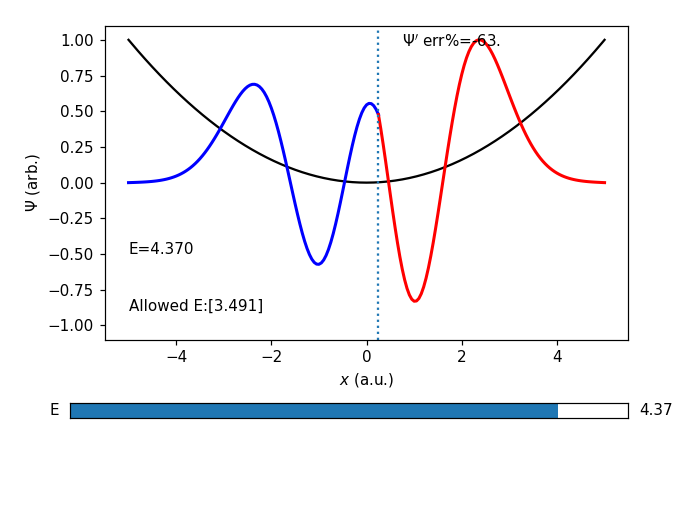

In [3]:
%matplotlib notebook
fig = plt.figure()
fig.canvas.set_window_title('Visualizing quantum states')
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.15, bottom=0.35, top=.95)
ax.plot(x, V/max(abs(V)+1.e-9), 'k-')   # add small num if V=0

plot1 = ax.plot(x[:m+1], 0*x[:m+1], 'b-', lw=2)[0]  # initiate plots
plot2 = ax.plot(x[m:], 0*x[m:], 'r-', lw=2)[0]
plt.axvline(x[m], ls=':')           # match pt
etxt = ax.text(-R, -.5, '')
dtxt = ax.text(x[m+10], .95, '')
good = [1.e10]
allowed = ax.text(-R, -.9, '')
plt.xlabel('$x$ (a.u.)'), plt.ylabel('$\Psi$ (arb.)')
plt.ylim(-1.1,1.1)

axes = fig.add_axes([.1, .20, .8, .03])             # energy slider
slider = Slider(axes, 'E', Emin, Emax, Emin)        # range, init val
slider.on_changed(updatefig)
updatefig(slider.val)

plt.show()